##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='sgd', loss=loss_fn, metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8289 - accuracy: 0.7362
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5917 - accuracy: 0.8065


In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.5835 - accuracy: 0.8042 - 585ms/epoch - 2ms/step


[0.5834878087043762, 0.8041999936103821]

In [9]:
node_weights = model.layers[1].weights[0].numpy()
node_weights = np.rot90(node_weights)
print(node_weights.shape)

(10, 784)


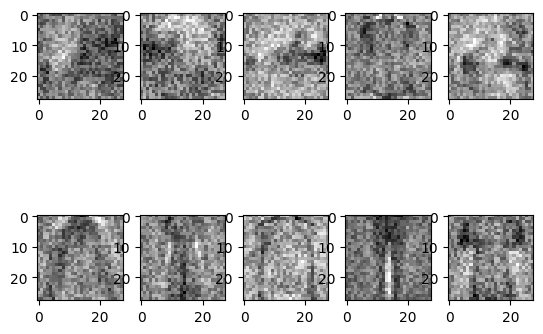

In [10]:
fig, axs = plt.subplots(2, 5)
row = -1
for i in range(node_weights.shape[0]):
    if i%5 == 0:
        row += 1
    axs[row][i%5].imshow(node_weights[i].reshape(28, 28), cmap=plt.cm.binary)